# Вибір оптимального набору регресорів

## Yuriy Ryzkin

### Варіант 4

Качаємо дані з минулих лабораторних

In [1]:
path_to_folder <- paste(dirname(getwd()),'/lab1/data',sep = '')
filenames = list.files(path = path_to_folder,full.names = TRUE)

In [2]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [3]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
number_rows<-nrow(df)

head(df)

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


In [4]:
data_test <- df[(number_rows-19):number_rows,]
data_model1 <- df[0:(number_rows-20),]
data_model2 <- df[(number_rows-69):(number_rows-20),]

In [8]:
library(leaps)

In [9]:
model_cp_1 <- regsubsets(tomorrow_apd~.-apd,data=data_model1,nbest=3,nvmax=9)
model_cp_2 <- regsubsets(tomorrow_apd~.-apd,data=data_model2,nbest=3,nvmax=9)

In [15]:
summary(model_cp_1)

Subset selection object
Call: regsubsets.formula(tomorrow_apd ~ . - apd, data = data_model1, 
    nbest = 3, nvmax = 9)
9 Variables  (and intercept)
     Forced in Forced out
amgn     FALSE      FALSE
amp      FALSE      FALSE
amt      FALSE      FALSE
amzn     FALSE      FALSE
an       FALSE      FALSE
anf      FALSE      FALSE
aon      FALSE      FALSE
apa      FALSE      FALSE
apc      FALSE      FALSE
3 subsets of each size up to 9
Selection Algorithm: exhaustive
         amgn amp amt amzn an  anf aon apa apc
1  ( 1 ) " "  " " " " " "  " " " " " " " " "*"
1  ( 2 ) " "  " " " " " "  " " " " "*" " " " "
1  ( 3 ) " "  " " "*" " "  " " " " " " " " " "
2  ( 1 ) " "  " " "*" " "  " " " " " " "*" " "
2  ( 2 ) " "  "*" " " " "  " " " " " " "*" " "
2  ( 3 ) " "  " " " " " "  " " " " "*" "*" " "
3  ( 1 ) " "  " " "*" " "  " " "*" " " "*" " "
3  ( 2 ) " "  "*" "*" " "  " " " " " " "*" " "
3  ( 3 ) " "  "*" " " "*"  " " " " " " "*" " "
4  ( 1 ) " "  " " "*" " "  "*" "*" " " "*" " "
4  ( 2 ) "*

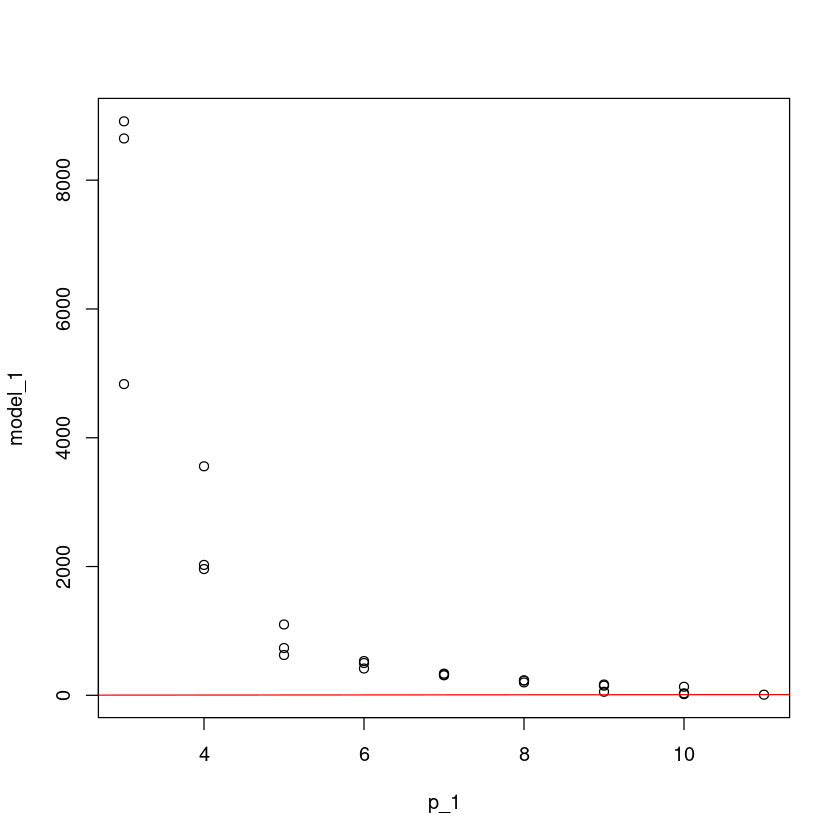

In [31]:
p_1<-apply(summary(model_cp_1)$which,1,sum)+1

model_1 <-summary(model_cp_1)$cp
plot(p_1,model_1)
abline(0,1,col="red")

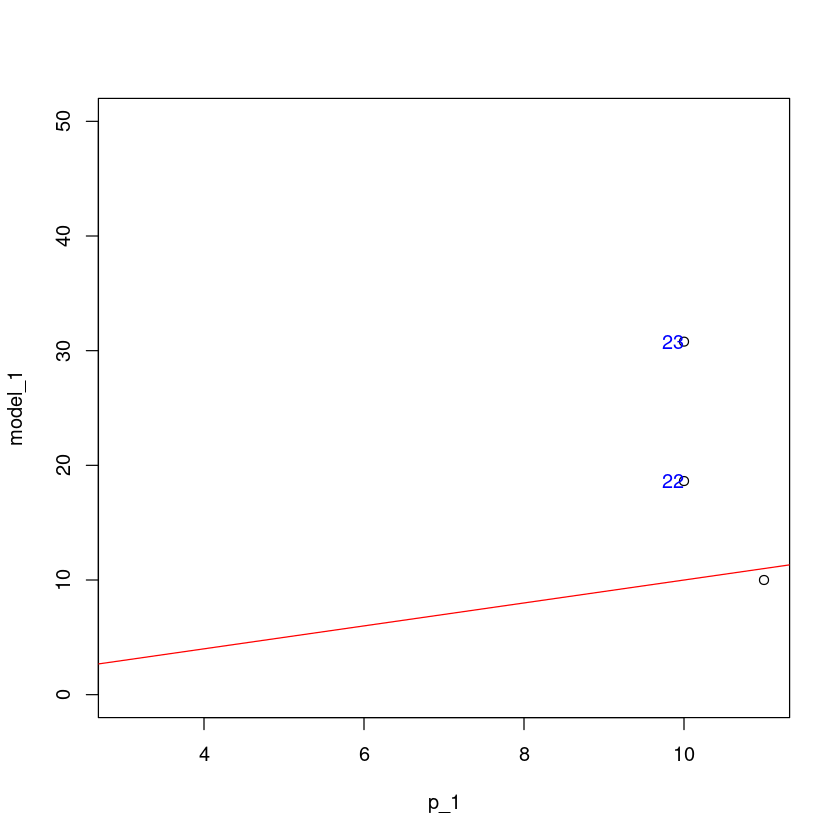

In [32]:
plot(p_1,model_1,ylim = c(0,50))
abline(0,1,col="red")
index <- c(22,23)
text(p_1[index],model_1[index],labels=index,col="blue",adj=1)

Найкраще значення можна помітити в точці з індексом 22

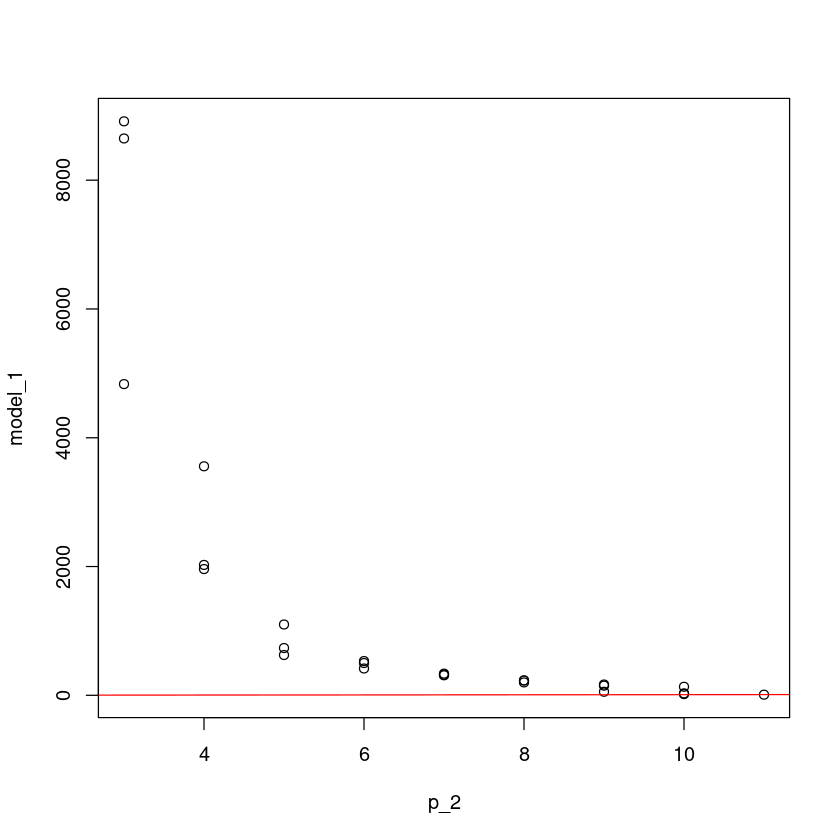

In [33]:
p_2<-apply(summary(model_cp_2)$which,1,sum)+1

model_2 <-summary(model_cp_2)$cp
plot(p_2,model_1)
abline(0,1,col="red")

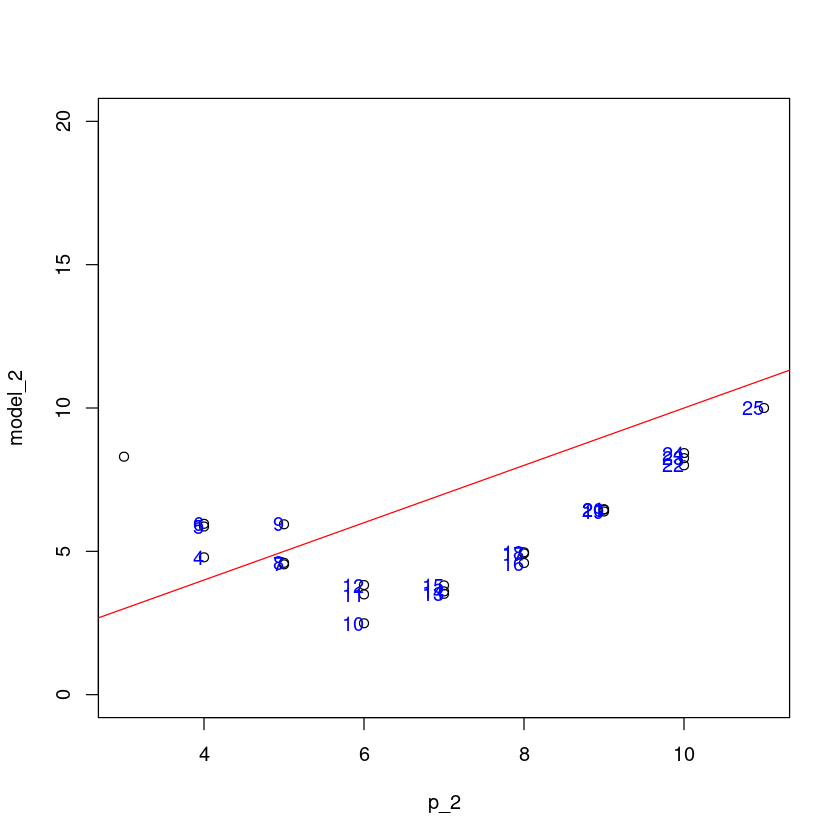

In [54]:
plot(p_2,model_2,ylim = c(0,20))
abline(0,1,col="red")

index <- c(4:26)
text(p_2[index],model_2[index],labels=index,col="blue",adj=1)

Для першої моделі

In [55]:
data.frame(coef(model_cp_1,22))

,coef.model_cp_1..22.
,<dbl>
(Intercept),16.4588110
amgn,-0.1834269
amp,0.2208043
amt,0.5510313
an,-0.3415477
anf,0.1257471
aon,0.1581759
apa,0.1671978
apc,0.2041428


Найбільш цікавими для нас є точки з індексом для другої моделі є 10, 8,4 

In [53]:
data.frame(coef(model_cp_2,4))
data.frame(coef(model_cp_2,8))
data.frame(coef(model_cp_2,10))

,coef.model_cp_2..4.
,<dbl>
(Intercept),61.5934568
amp,0.7818514
aon,-0.4815295


,coef.model_cp_2..8.
,<dbl>
(Intercept),56.8173500
amp,0.6783024
aon,-0.4233090
apa,0.1132937


,coef.model_cp_2..10.
,<dbl>
(Intercept),70.5847850
amp,1.0548331
amt,0.1648966
an,-0.4753798
aon,-0.8253189


In [59]:
colnames(data_test)

[1] "amgn"         "amp"          "amt"          "amzn"         "an"          
 [6] "anf"          "aon"          "apa"          "apc"          "apd"         
[11] "tomorrow_apd"

In [65]:
as.vector(coef(model_cp_1,22))[1]

[1] 16.45881

In [72]:
coef(model_cp_1,22)[2:9]

amgn        amp        amt         an        anf        aon        apa 
-0.1834269  0.2208043  0.5510313 -0.3415477  0.1257471  0.1581759  0.1671978 
       apc 
 0.2041428

In [74]:
cols_1 <- c('amgn','amp','amt','an','anf','aon','apa','apc')
predict_1 <- as.vector(as.matrix(data_test[,cols_1])%*%as.vector(coef(model_cp_1,22)[2:9])+coef(model_cp_1,22)[1])

In [83]:
predict_2_10 <- as.vector(as.matrix(data_test[,c('amp','amt','an','aon')])%*%as.vector(coef(model_cp_2,10)[2:5])
                          +coef(model_cp_2,10)[1])
predict_2_4 <- as.vector(as.matrix(data_test[,c('amp','aon')])%*%as.vector(coef(model_cp_2,4)[2:3])
                         +coef(model_cp_2,4)[1])
predict_2_8 <- as.vector(as.matrix(data_test[,c('amp','aon','apa')])%*%as.vector(coef(model_cp_2,8)[2:4])
                         +coef(model_cp_2,8)[1])

In [81]:
y_pred <- data_test[,11]

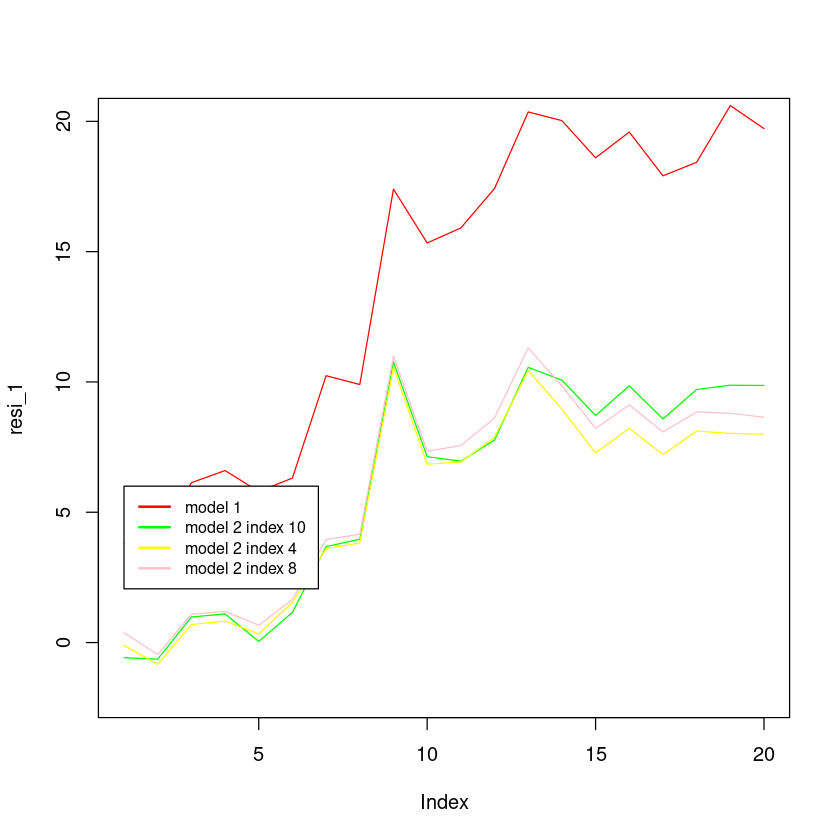

In [92]:
resi_1 <- y_pred - predict_1
resi_2_10 <-y_pred - predict_2_10
resi_2_4 <-y_pred - predict_2_4
resi_2_8 <-y_pred - predict_2_8

plot(resi_1,type="l",col="red",ylim = c(-2,20))
lines(resi_2_10,col="green")
lines(resi_2_4,col="yellow")
lines(resi_2_8,col="pink")
legend(1, 6, legend=c("model 1", "model 2 index 10",'model 2 index 4','model 2 index 8'),
       col=c("red","green",'yellow','pink'),lwd =2,cex=0.8)

Якби ми бачимо, що у нас перша модель справилась гірше за будь-який прогноз з коефіцієнтами з моделі 2. А от визначити кращу модель серед індексів 10, 4, 8 доволі важко. Дуже схоже, що це модель з індексом 4, але давайте перевіримо це на метриках.

In [93]:
library(Metrics)
cat('MAE:\n model 1: ',mae(y_pred,predict_1),
    '\n model 2 index 10 :',mae(y_pred,predict_2_10),
     '\n model 2 index 4:',mae(y_pred,predict_2_4),
   '\nmodel 2 index 8',mae(y_pred,predict_2_8))


cat('MSE:\n model 1: ',mse(y_pred,predict_1),
    '\n model 2 index 10 :',mse(y_pred,predict_2_10),
     '\n model 2 index 4:',mse(y_pred,predict_2_4),
   '\nmodel 2 index 8',mse(y_pred,predict_2_8))


MAE:
 model 1:  13.70204 
 model 2 index 10 : 6.099816 
 model 2 index 4: 5.510565 
model 2 index 8 6.046406MSE:
 model 1:  225.061 
 model 2 index 10 : 52.88345 
 model 2 index 4: 42.81348 
model 2 index 8 50.82321

Візьмемо найкращу модель і порівняємо її з моделями, які були в інших лабораторних

In [101]:
# Lab 1
model_all <-lm(tomorrow_apd~.-tomorrow_apd-apd,data=df[(number_rows-50):number_rows,])

#Lab 2
data_model2 <- df[(number_rows-69):(number_rows-20),]
data_model2_X_train <- data_model2[,1:9]
data_model2_Y_train <- data_model2[,11]
PC_2 <- princomp(data_model2_X_train,cor =  T)


data2 <- data.frame(PC_2$scores)

colnames(data2) <- c('first','second','third','forth','5','6','7','8','9')

model_PC2 <- lm(data_model2_Y_train~first+second+third+forth,data = data2)

#Lab 3
library(MASS)
model_ridge_2 <- lm.ridge(formula = tomorrow_apd~.-apd,data = data_model2,lambda = seq(0.001,50,.01))
i_2<-which.min(model_ridge_2$GCV)
coefs_2 <-matrix(model_ridge_2$coef[,i_2]/model_ridge_2$scales,ncol=1)
predict_ridge_2 <- as.vector(as.matrix(data_test[,1:9])%*%coefs_2) - 
                as.vector((t(coefs_2)%*%model_ridge_2$xm)+model_ridge_2$ym)

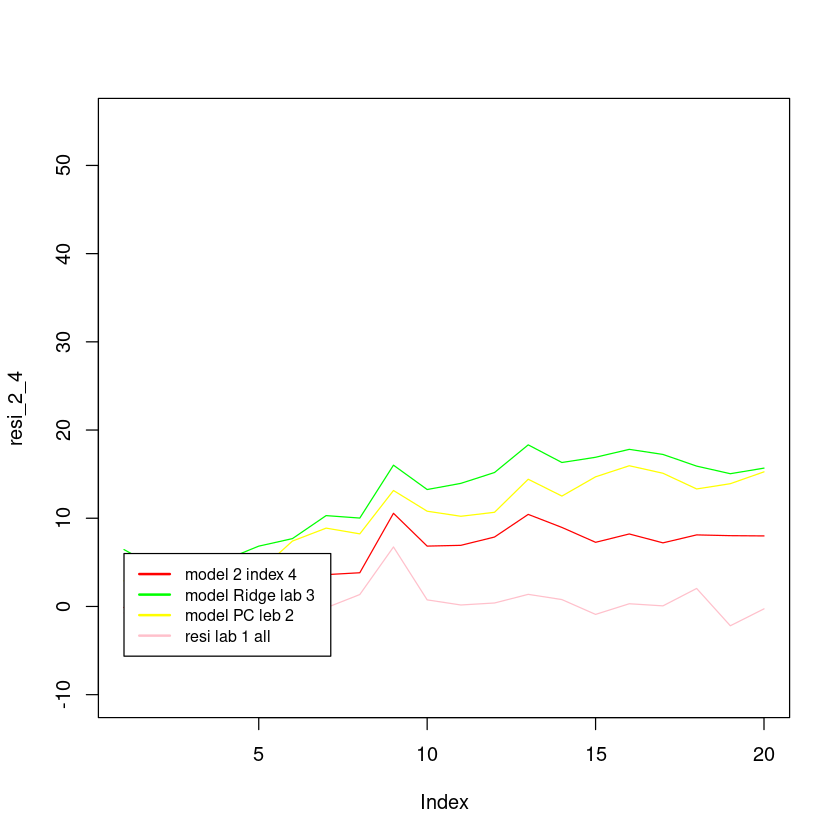

In [102]:
resi_2 <-y_pred+predict_ridge_2
PC_test <- princomp(data_test[,1:9],cor =  T)
data_X_test <- data.frame(PC_test$scores)
rownames(data_X_test) <- 1:nrow(data_X_test)
colnames(data_X_test) <- c('first','second','third','forth','5','6','7','8','9')

resi_PC2<-y_pred-predict(model_PC2,data_X_test)
resi_lab_1_all <- y_pred-predict(model_all,data_test)

plot(resi_2_4,type="l",col="red",ylim = c(-10,55))
lines(resi_2,col="green")
lines(resi_PC2,col="yellow")
lines(resi_lab_1_all,col="pink")
legend(1, 6, legend=c("model 2 index 4", "model Ridge lab 3 ",'model PC leb 2 ','resi lab 1 all'),
       col=c("red","green",'yellow','pink'),lwd =2,cex=0.8)

Все ще найкращою моделлю у нас є модель звичайної регресії. На другому місці іде наша модель. Потім модель з головними компонентами, а потім вже модель рідж регресії

Висновок:

У кожної з цих  моделей є свій шлях використання. Тому давайте коротко про переваги кожної з моделей.

1. Звичайна модель регресії як на мене доволі швидка, легко програмується та показує непогані результати. Як якийсь бенчмарк для всіх інших використовується.
2. Модель на основі головних компонент варто використовувати, коли вимірність наших даних сягає тисяч чи десятків тисяч. 
3. Модель з рідж регресією дозволяє ефективно будувати регресію у випадку мультиколінеарності.
4. Модель оптимального набору регресорів варто використовувати, коли ми хочемо еффективно відділити ключові регресори для прогнозу. 